<a href="https://colab.research.google.com/github/Nabeel110/Deep-Learning/blob/master/Reuters_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 58.4MB/s 
     |████████████████████████████████| 3.8MB 27.1MB/s 
     |████████████████████████████████| 81kB 13.8MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt 

# Loading Dataset

In [5]:
(train_data, train_labels), (test_data, test_labels)  = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [6]:
print(len(train_data))
print(len(test_data))

8982
2246


# Data Preparation

In [0]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# Another way for One hot Encoding is using to_categorical method

In [0]:
one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)

In [0]:
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]

partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:] 

# Network Architecture

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation ='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [17]:
model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=512, validation_data= (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 291us/sample - loss: 2.5742 - acc: 0.5299 - val_loss: 1.6952 - val_acc: 0.6320
Epoch 2/20
7982/7982 [==============================] - 0s 45us/sample - loss: 1.4023 - acc: 0.7077 - val_loss: 1.2880 - val_acc: 0.7170
Epoch 3/20
7982/7982 [==============================] - 0s 45us/sample - loss: 1.0314 - acc: 0.7805 - val_loss: 1.1164 - val_acc: 0.7490
Epoch 4/20
7982/7982 [==============================] - 0s 46us/sample - loss: 0.8036 - acc: 0.8294 - val_loss: 1.0148 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 0s 44us/sample - loss: 0.6365 - acc: 0.8646 - val_loss: 0.9479 - val_acc: 0.7940
Epoch 6/20
7982/7982 [==============================] - 0s 44us/sample - loss: 0.5109 - acc: 0.8921 - val_loss: 0.9163 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 0s 44us/sample - loss: 0.4056 - acc: 0.9162 - val_loss: 0.8920 - val_acc:

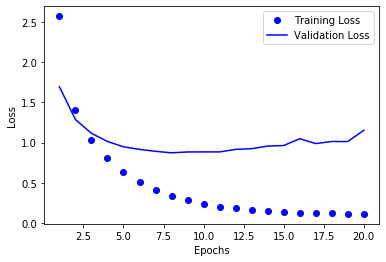

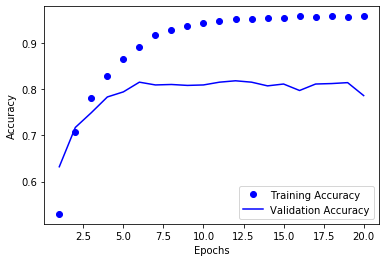

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label ="Training Loss")
plt.plot(epochs, val_loss,'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc_values, 'bo', label ="Training Accuracy")
plt.plot(epochs, val_acc,'b', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [0]:
def model_2(partial_x_train, partial_y_train):
  model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])
  history = model.fit(partial_x_train, partial_y_train, epochs = 5, batch_size=512, validation_data= (x_val, y_val))


  # plotting Graph
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss = history_dict['val_loss']
  epochs = range(1, len(loss_values)+1)
  plt.plot(epochs, loss_values, 'bo', label ="Training Loss")
  plt.plot(epochs, val_loss,'b', label = 'Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.clf()
  acc_values = history_dict['acc']
  val_acc = history_dict['val_acc']
  epochs = range(1, len(loss_values)+1)
  plt.plot(epochs, acc_values, 'bo', label ="Training Accuracy")
  plt.plot(epochs, val_acc,'b', label = 'Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()



Train on 7982 samples, validate on 1000 samples
Epoch 1/5
7982/7982 [==============================] - 1s 92us/sample - loss: 0.1215 - acc: 0.9564 - val_loss: 1.2694 - val_acc: 0.7920
Epoch 2/5
7982/7982 [==============================] - 0s 44us/sample - loss: 0.0935 - acc: 0.9587 - val_loss: 1.1891 - val_acc: 0.8090
Epoch 3/5
7982/7982 [==============================] - 0s 45us/sample - loss: 0.0896 - acc: 0.9609 - val_loss: 1.1867 - val_acc: 0.8110
Epoch 4/5
7982/7982 [==============================] - 0s 45us/sample - loss: 0.0884 - acc: 0.9595 - val_loss: 1.1908 - val_acc: 0.7990
Epoch 5/5
7982/7982 [==============================] - 0s 41us/sample - loss: 0.0872 - acc: 0.9597 - val_loss: 1.2248 - val_acc: 0.7950


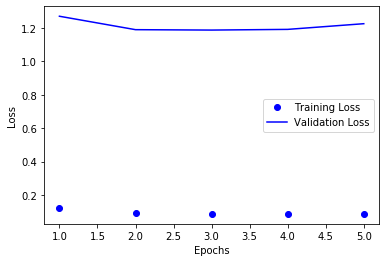

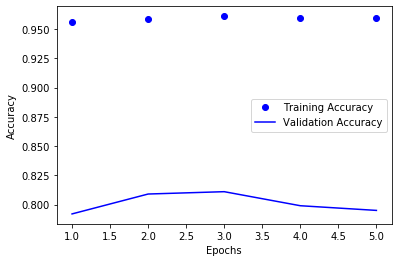

In [23]:
model_2 = model_2(partial_x_train,partial_y_train)

In [0]:
predictions = model.predict(x_test)

In [25]:
predictions

array([[1.0566729e-07, 9.6849726e-07, 6.0845168e-10, ..., 9.7618291e-14,
        2.2292579e-15, 3.0252063e-09],
       [2.6742909e-03, 2.3891372e-03, 5.6296212e-06, ..., 3.4218806e-07,
        3.5451113e-13, 7.7274088e-08],
       [1.6502855e-02, 5.1379263e-01, 2.6400842e-02, ..., 5.9809662e-07,
        4.3582218e-09, 5.1120832e-04],
       ...,
       [6.8233774e-08, 6.1885053e-06, 2.3748056e-08, ..., 1.9829955e-11,
        2.5881790e-11, 1.3233115e-07],
       [6.2338924e-03, 6.7050196e-02, 2.2678537e-04, ..., 9.7310226e-07,
        1.7506789e-08, 1.6781583e-04],
       [1.1915888e-04, 9.4471508e-01, 8.1288377e-03, ..., 1.5546235e-07,
        2.0149168e-08, 6.0899532e-07]], dtype=float32)

In [26]:
predictions.shape

(2246, 46)

In [28]:
predictions[0].sum()

1.0

In [31]:
predictions[0].argmax()

3

In [34]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
# model_3 = model_3(x_train, y_train)

model.compile(optimizer= 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 4, batch_size=512,)

Train on 8982 samples
Epoch 1/4
8982/8982 [==============================] - 1s 88us/sample - loss: 0.1733 - acc: 0.9482
Epoch 2/4
8982/8982 [==============================] - 0s 38us/sample - loss: 0.1293 - acc: 0.9517
Epoch 3/4
8982/8982 [==============================] - 0s 39us/sample - loss: 0.1140 - acc: 0.9541
Epoch 4/4
8982/8982 [==============================] - 0s 38us/sample - loss: 0.1074 - acc: 0.9555


In [0]:
predictions = model.predict(x_test) 

In [37]:
predictions.shape

(2246, 46)

In [40]:
predictions[0].argmax()

3